<a href="https://colab.research.google.com/github/Chakon29/Chat/blob/main/Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from posixpath import sep
import pandas as pd
df = pd.read_csv("Anexo ET_demo_round_traces.csv", sep =";")


<ipython-input-7-f9440eb6a89f>:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces.csv", sep =";")


In [22]:
# Analizar la columna 'RoundKills'
round_kills = df.groupby('Map')['RoundKills']
# Resumen estadístico inicial
summary_stats = round_kills.describe()

summary_stats

,count,mean,std,min,25%,50%,75%,max
Map,,,,,,,,
de_dust2,19120.0,0.672123,0.886508,0.0,0.0,0.0,1.0,5.0
de_inferno,28869.0,0.666667,0.883260,0.0,0.0,0.0,1.0,5.0
de_mirage,19019.0,0.674904,0.876089,0.0,0.0,0.0,1.0,5.0
de_nuke,12149.0,0.675693,0.879851,0.0,0.0,0.0,1.0,5.0


<ipython-input-34-16428465386d>:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Anexo ET_demo_round_traces.csv', delimiter=';')


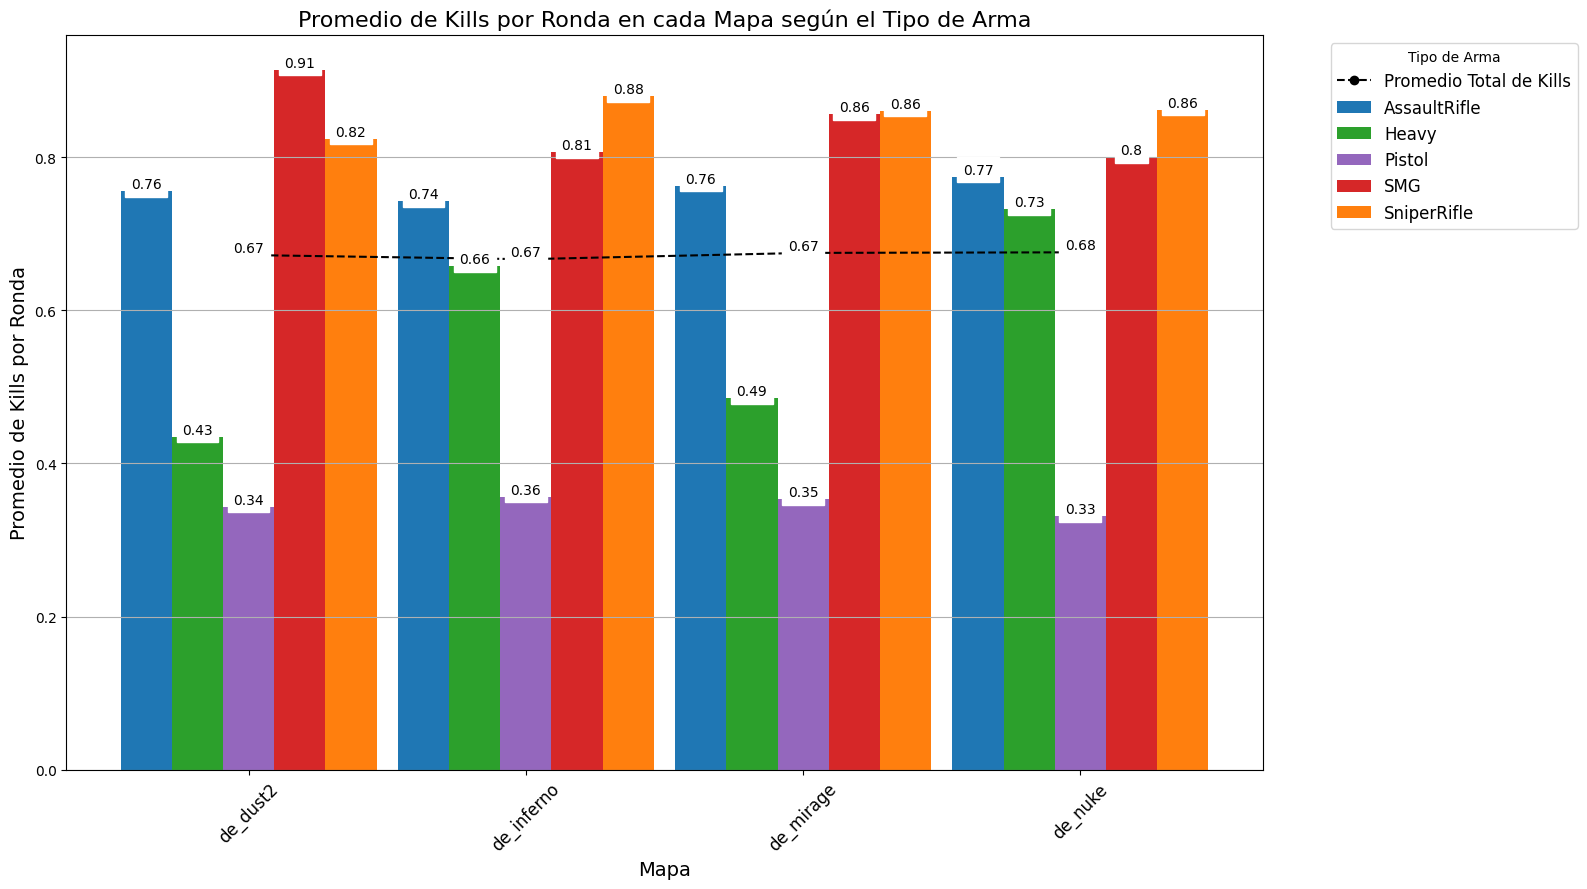

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
data = pd.read_csv('Anexo ET_demo_round_traces.csv', delimiter=';')

# Filtrar solo las columnas necesarias
relevant_columns = ['Map', 'RoundKills', 'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
data = data[relevant_columns]

# Crear una columna para identificar el tipo de arma principal utilizada
def determine_primary_weapon(row):
    if row['PrimaryAssaultRifle'] > 0:
        return 'AssaultRifle'
    elif row['PrimarySniperRifle'] > 0:
        return 'SniperRifle'
    elif row['PrimaryHeavy'] > 0:
        return 'Heavy'
    elif row['PrimarySMG'] > 0:
        return 'SMG'
    elif row['PrimaryPistol'] > 0:
        return 'Pistol'
    else:
        return 'Other'

data['PrimaryWeapon'] = data.apply(determine_primary_weapon, axis=1)

# Agrupar por mapa y tipo de arma, y calcular el promedio de RoundKills
kills_grouped_data = data.groupby(['Map', 'PrimaryWeapon'])['RoundKills'].mean().reset_index()

# Agrupar por mapa y calcular el promedio total de RoundKills
total_kills_grouped_data = data.groupby('Map')['RoundKills'].mean().reset_index()

# Configurar el gráfico
fig, ax = plt.subplots(figsize=(16, 9))

# Colores para cada tipo de arma
colors = {'AssaultRifle':'#1f77b4', 'SniperRifle':'#ff7f0e', 'Heavy':'#2ca02c', 'SMG':'#d62728', 'Pistol':'#9467bd', 'Other':'#8c564b'}

# Crear el gráfico de barras para cada tipo de arma en cada mapa
bar_width = 0.12
spacing = 0.05
maps = kills_grouped_data['Map'].unique()
weapons = kills_grouped_data['PrimaryWeapon'].unique()
x = np.arange(len(maps)) * (len(weapons) * bar_width + spacing)

# Dibujar las barras
for i, weapon in enumerate(weapons):
    weapon_data = kills_grouped_data[kills_grouped_data['PrimaryWeapon'] == weapon]
    bars = ax.bar(x + i * bar_width, weapon_data['RoundKills'], bar_width, label=weapon, color=colors[weapon])

    # Añadir el promedio arriba de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10, backgroundcolor='white')

# Dibujar la línea para el promedio total de kills por mapa
ax.plot(x + (len(weapons) - 1) * bar_width / 2, total_kills_grouped_data['RoundKills'], color='black', marker='o', linestyle='dashed', label='Promedio Total de Kills')

# Añadir el promedio total de kills por mapa como un texto
for i, txt in enumerate(total_kills_grouped_data['RoundKills']):
    ax.text(x[i] + (len(weapons) - 1) * bar_width / 2, txt, round(txt, 2), va='bottom', ha='center', fontsize=10, backgroundcolor='white')

# Configurar etiquetas y título
ax.set_xlabel('Mapa', fontsize=14)
ax.set_ylabel('Promedio de Kills por Ronda', fontsize=14)
ax.set_title('Promedio de Kills por Ronda en cada Mapa según el Tipo de Arma', fontsize=16)
ax.set_xticks(x + (len(weapons) - 1) * bar_width / 2)
ax.set_xticklabels(maps, fontsize=12)
ax.legend(title='Tipo de Arma', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.xticks(rotation=45, fontsize=12)
ax.grid(axis='y')

# Ajustar el diseño para evitar la superposición
plt.tight_layout()
plt.show()
